# In-class Exercise: Mini Triage Dashboard (Python Basics)

**Context:** You are prototyping backend logic for a simple emergency department triage dashboard. You receive encounter records as a *list of dictionaries* (similar to JSON from an API). Your job is to calculate a triage score, assign a priority bucket, summarize the queue, and choose who should be seen next.

## Learning goals
By completing this notebook you will practice:
- Writing **functions** with parameters and return values
- Using **loops** and **conditionals**
- Working with **lists** and **dictionaries** (including a list of dicts)
- Creating summary outputs useful for dashboards

---

## Instructions
Work top-to-bottom. **Do not skip cells.**
- Cells labeled **TODO** contain places where you must write code.
- Run each cell after you finish it.


## 0) Setup: Provided sample data
Run this cell to load the example encounter data.


In [2]:
encounters = [
    {"id": "E001", "age": 72, "hr": 118, "sbp": 86,  "chief_complaint": "chest pain", "arrival_min": 5},
    {"id": "E002", "age": 34, "hr": 92,  "sbp": 122, "chief_complaint": "headache",   "arrival_min": 12},
    {"id": "E003", "age": 58, "hr": 105, "sbp": 99,  "chief_complaint": "shortness of breath", "arrival_min": 30},
    {"id": "E004", "age": 81, "hr": 88,  "sbp": 140, "chief_complaint": "fall",       "arrival_min": 55},
    {"id": "E005", "age": 47, "hr": 131, "sbp": 92,  "chief_complaint": "fever",      "arrival_min": 18},
    {"id": "E006", "age": 29, "hr": 76,  "sbp": 110, "chief_complaint": "abdominal pain", "arrival_min": 40},
]

high_risk_complaints = ["chest pain", "shortness of breath", "stroke symptoms"]

print("Loaded", len(encounters), "encounters")
print("Example record:", encounters[0])

Loaded 6 encounters
Example record: {'id': 'E001', 'age': 72, 'hr': 118, 'sbp': 86, 'chief_complaint': 'chest pain', 'arrival_min': 5}


# 1) Warm-up: List operations (8–12 minutes)

This warm-up prepares you for the main exercise. You will practice:
- indexing (first/last)
- appending items
- looping through a list
- building a new list

## 1A) Micro-drills with a simple list
Complete the TODOs and run the cell.


In [7]:
# WARM-UP LIST MICRO-DRILLS

temps_f = [98.6, 101.2, 99.1, 102.5, 97.9]

# 1) Indexing: print the first and last items
print("First temp:", temps_f[0])
print("Last temp:", temps_f[-1])

# 2) Append: add a new temperature reading
# TODO: append 100.4 to temps_f
# temps_f.____(____)

# 3) Loop: count how many temps are >= 100.4 (fever threshold)
fever_count = 0
for t in temps_f:
    # TODO: if t is >= 100.4, increase fever_count
    pass

print("Fever count:", fever_count)

# 4) Build a new list: convert all temps to Celsius (rounded to 1 decimal)
temps_c = []
for t in temps_f:
    c = (t - 32) * 5/9
    # TODO: append rounded c to temps_c
    pass

print("Temps in C:", temps_c)

# 5) Optional: slicing
print("First three readings:", temps_f[:3])

First temp: 98.6
Last temp: 97.9
Fever count: 0
Temps in C: []
First three readings: [98.6, 101.2, 99.1]


In [10]:
temps_f = [98.6, 101.2, 99.1, 102.5, 97.9]

print("First temp:", temps_f[0])
print("Last temp:", temps_f[-1])

temps_f.append(100.4)

fever_count = 0
for t in temps_f:
    if t >= 100.4:
        fever_count += 1

print("Fever count:", fever_count)

temps_c = []
for t in temps_f:
    c = (t - 32) * 5/9
    temps_c.append(round(c, 1))

print("Temps in C:", temps_c)

print("First three readings:", temps_f[:3])

First temp: 98.6
Last temp: 97.9
Fever count: 3
Temps in C: [37.0, 38.4, 37.3, 39.2, 36.6, 38.0]
First three readings: [98.6, 101.2, 99.1]


## 1B) Warm-up with a list of dictionaries
This mirrors the structure of the real encounter data.
Complete the TODOs and run the cell.


In [11]:
# WARM-UP: LIST OF DICTS

mini_encounters = [
    {"id": "E001", "age": 72},
    {"id": "E002", "age": 34},
    {"id": "E003", "age": 58},
]

# 1) Access: print the id of the first encounter
print("First id:", mini_encounters[0]["id"])

# 2) Loop: build a list of just the ids
ids = []
for e in mini_encounters:
    # TODO: append e["id"] to ids
    pass

print("IDs:", ids)

# 3) Add a new dict: append a new encounter
# TODO: append {"id":"E004","age":81} to mini_encounters

print("Total encounters now:", len(mini_encounters))
print("Last encounter:", mini_encounters[-1])

First id: E001
IDs: []
Total encounters now: 3
Last encounter: {'id': 'E003', 'age': 58}


In [12]:
mini_encounters = [
    {"id": "E001", "age": 72},
    {"id": "E002", "age": 34},
    {"id": "E003", "age": 58},
]

print("First id:", mini_encounters[0]["id"])

ids = []
for e in mini_encounters:
    ids.append(e["id"])

print("IDs:", ids)

mini_encounters.append({"id": "E004", "age": 81})

print("Total encounters now:", len(mini_encounters))
print("Last encounter:", mini_encounters[-1])

First id: E001
IDs: ['E001', 'E002', 'E003']
Total encounters now: 4
Last encounter: {'id': 'E004', 'age': 81}


# 2) Main Exercise: Mini Triage Dashboard (45–60 minutes)

## Overview
You will implement five functions:
1. `triage_score(encounter, high_risk_list)`
2. `priority_bucket(score)`
3. `annotate_encounters(encounters, high_risk_list)`
4. `priority_summary(annotated)`
5. `next_up(annotated)`

### Triage scoring rules
Start score at 0 and add points:
- If `age >= 65`: +2
- If `hr >= 120`: +2
- If `sbp < 90`: +3
- If `chief_complaint` is in `high_risk_list`: +2
- If `arrival_min <= 10`: +1

### Priority buckets
- score **>= 7** → `"RED"`
- score **4–6** → `"YELLOW"`
- score **0–3** → `"GREEN"`


## 2A) Implement `triage_score(encounter, high_risk_list)`
Complete the function below according to the rules above.

**Tips:**
- Use `encounter["age"]` to access values.
- Use `if` statements to add to `score`.


In [13]:
def triage_score(encounter, high_risk_list):
    score = 0
    # TODO: implement scoring rules
    return score

# Quick self-check (should print <class 'int'>)
print(type(triage_score(encounters[0], high_risk_complaints)))

<class 'int'>


In [14]:
# 2A) triage_score
def triage_score(encounter, high_risk_list):
    score = 0
    if encounter["age"] >= 65:
        score += 2
    if encounter["hr"] >= 120:
        score += 2
    if encounter["sbp"] < 90:
        score += 3
    if encounter["chief_complaint"] in high_risk_list:
        score += 2
    if encounter["arrival_min"] <= 10:
        score += 1
    return score

# Quick test
print(triage_score(encounters[0], high_risk_complaints))  # E001: age72 +2, hr118 no, sbp86 +3, chest pain +2, arrival5 +1 = 8

8


## 2B) Implement `priority_bucket(score)`
Return the correct bucket name as a string.


In [15]:
def priority_bucket(score):
    # TODO: implement bucket rules
    pass

# Quick self-check (should print: GREEN YELLOW RED)
print(priority_bucket(0), priority_bucket(4), priority_bucket(7))

None None None


In [16]:
# 2B) priority_bucket
def priority_bucket(score):
    if score >= 7:
        return "RED"
    elif score >= 4:
        return "YELLOW"
    else:
        return "GREEN"

# Quick test
print(priority_bucket(8))   # RED
print(priority_bucket(5))   # YELLOW
print(priority_bucket(2))   # GREEN

RED
YELLOW
GREEN


## 2C) Implement `annotate_encounters(encounters, high_risk_list)`
Create and return a **new list** where each encounter dict has two additional keys:
- `"score"`
- `"priority"`

**Important:** Do not modify the original dicts in the original list.

**Hint:** You can copy a dictionary using `new_dict = old_dict.copy()`.


In [17]:
def annotate_encounters(encounters, high_risk_list):
    annotated = []
    # TODO: loop through encounters, copy each dict, compute score & priority, append
    return annotated

annotated = annotate_encounters(encounters, high_risk_complaints)
print("Original has score key?", "score" in encounters[0])
print("Annotated example:", annotated[0] if annotated else "(empty)")

Original has score key? False
Annotated example: (empty)


In [18]:
# 2C) annotate_encounters
def annotate_encounters(encounters, high_risk_list):
    annotated = []
    for e in encounters:
        score = triage_score(e, high_risk_list)
        e["score"] = score
        e["priority"] = priority_bucket(score)
        annotated.append(e)
    return annotated

annotated = annotate_encounters(encounters, high_risk_complaints)
for a in annotated:
    print(a["id"], "| score:", a["score"], "| priority:", a["priority"])

E001 | score: 8 | priority: RED
E002 | score: 0 | priority: GREEN
E003 | score: 2 | priority: GREEN
E004 | score: 2 | priority: GREEN
E005 | score: 2 | priority: GREEN
E006 | score: 0 | priority: GREEN


## 2D) Implement `priority_summary(annotated)`
Return a dictionary of counts by priority.

Example output:
```python
{"RED": 2, "YELLOW": 2, "GREEN": 2}
```

**Requirement:** Ensure all three keys exist even if a count is 0.


In [19]:
def priority_summary(annotated):
    summary = {"RED": 0, "YELLOW": 0, "GREEN": 0}
    # TODO: loop and count
    return summary

print("Summary:", priority_summary(annotated))

Summary: {'RED': 0, 'YELLOW': 0, 'GREEN': 0}


In [20]:
# 2D) priority_summary
def priority_summary(annotated):
    summary = {"RED": 0, "YELLOW": 0, "GREEN": 0}
    for a in annotated:
        summary[a["priority"]] += 1
    return summary

print(priority_summary(annotated))

{'RED': 1, 'YELLOW': 0, 'GREEN': 5}


## 2E) Implement `next_up(annotated)`
Return the **encounter id** of who should be seen next.

Rules:
- Highest **score** wins
- If there is a tie, the smaller `arrival_min` wins (arrived earlier)

**Hint:** Track the "best" encounter while looping.


In [21]:
def next_up(annotated):
    # TODO: implement selection logic
    pass

print("Next up:", next_up(annotated))

Next up: None


In [22]:
# 2E) next_up
def next_up(annotated):
    best = None
    for a in annotated:
        if best is None:
            best = a
        elif a["score"] > best["score"]:
            best = a
        elif a["score"] == best["score"] and a["arrival_min"] > best["arrival_min"]:
            best = a
    return best

result = next_up(annotated)
print("Next up:", result["id"], "| score:", result["score"], "| waited:", result["arrival_min"], "min")

Next up: E001 | score: 8 | waited: 5 min


# 3) Run the dashboard output
When everything is implemented, run this cell.


In [24]:
annotated = annotate_encounters(encounters, high_risk_complaints)

print("Annotated encounters:")
for e in annotated:
    print(e["id"], e["score"], e["priority"], "arrival_min=", e["arrival_min"])

print("\nSummary:", priority_summary(annotated))
print("Next up:", next_up(annotated))

Annotated encounters:
E001 8 RED arrival_min= 5
E002 0 GREEN arrival_min= 12
E003 2 GREEN arrival_min= 30
E004 2 GREEN arrival_min= 55
E005 2 GREEN arrival_min= 18
E006 0 GREEN arrival_min= 40

Summary: {'RED': 1, 'YELLOW': 0, 'GREEN': 5}
Next up: {'id': 'E001', 'age': 72, 'hr': 118, 'sbp': 86, 'chief_complaint': 'chest pain', 'arrival_min': 5, 'score': 8, 'priority': 'RED'}


# 4) Stretch (optional)
Pick ONE if you finish early.

## Stretch A: Group encounter IDs by priority
Write a function `group_by_priority(annotated)` that returns:
```python
{"RED": ["E001", ...], "YELLOW": [...], "GREEN": [...]}
```

## Stretch B: Data quality checks
Write `validate(encounter)` that returns `True/False` if required keys exist and values are sensible (e.g., SBP > 0). Skip invalid encounters.

## Stretch C: Make weights configurable
Create a dict of weights and use it in `triage_score` so you can change scoring without rewriting logic.


In [25]:
# Stretch A: Group by priority
def group_by_priority(annotated):
    groups = {"RED": [], "YELLOW": [], "GREEN": []}
    for a in annotated:
        groups[a["priority"]].append(a["id"])
    return groups

print(group_by_priority(annotated))

{'RED': ['E001'], 'YELLOW': [], 'GREEN': ['E002', 'E003', 'E004', 'E005', 'E006']}


In [26]:
# Stretch B: Data quality checks
def validate(encounter):
    required_keys = ["id", "age", "hr", "sbp", "chief_complaint", "arrival_min"]
    for key in required_keys:
        if key not in encounter:
            return False
    if encounter["age"] < 0 or encounter["age"] > 130:
        return False
    if encounter["hr"] <= 0:
        return False
    if encounter["sbp"] <= 0:
        return False
    if encounter["arrival_min"] < 0:
        return False
    return True

# Test with good and bad data
print(validate(encounters[0]))  # True
print(validate({"id": "E999", "age": -5, "hr": 80, "sbp": 120, "chief_complaint": "cough", "arrival_min": 10}))  # False
print(validate({"id": "E998"}))  # False (missing keys)

True
False
False


In [27]:
# Stretch C: Configurable weights
default_weights = {
    "age_65": 2,
    "hr_120": 2,
    "sbp_90": 3,
    "high_risk": 2,
    "arrival_10": 1,
}

def triage_score_weighted(encounter, high_risk_list, weights=default_weights):
    score = 0
    if encounter["age"] >= 65:
        score += weights["age_65"]
    if encounter["hr"] >= 120:
        score += weights["hr_120"]
    if encounter["sbp"] < 90:
        score += weights["sbp_90"]
    if encounter["chief_complaint"] in high_risk_list:
        score += weights["high_risk"]
    if encounter["arrival_min"] <= 10:
        score += weights["arrival_10"]
    return score

# Default weights — same as before
print("Default:", triage_score_weighted(encounters[0], high_risk_complaints))

# Custom weights — e.g., prioritize low blood pressure more
custom = default_weights.copy()
custom["sbp_90"] = 5
print("Custom:", triage_score_weighted(encounters[0], high_risk_complaints, custom))

Default: 8
Custom: 10



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


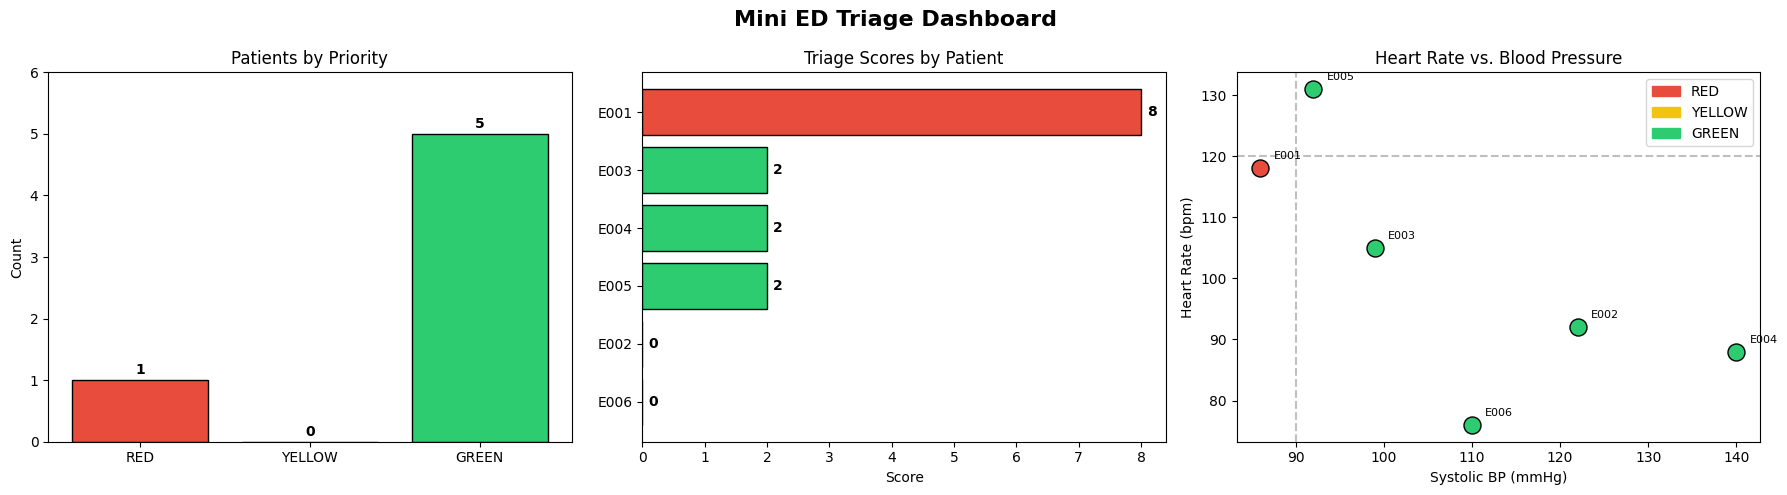

In [30]:
!pip install matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Color map matching triage priorities
colors = {"RED": "#e74c3c", "YELLOW": "#f1c40f", "GREEN": "#2ecc71"}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Mini ED Triage Dashboard", fontsize=16, fontweight="bold")

# --- Panel 1: Patient count by priority ---
summary = priority_summary(annotated)
buckets = ["RED", "YELLOW", "GREEN"]
counts = [summary[b] for b in buckets]
bar_colors = [colors[b] for b in buckets]

axes[0].bar(buckets, counts, color=bar_colors, edgecolor="black")
axes[0].set_title("Patients by Priority")
axes[0].set_ylabel("Count")
for i, v in enumerate(counts):
    axes[0].text(i, v + 0.1, str(v), ha="center", fontweight="bold")
axes[0].set_ylim(0, max(counts) + 1)

# --- Panel 2: Patients ranked by triage score ---
sorted_enc = sorted(annotated, key=lambda x: x["score"], reverse=True)
ids = [e["id"] for e in sorted_enc]
scores = [e["score"] for e in sorted_enc]
hbar_colors = [colors[e["priority"]] for e in sorted_enc]

axes[1].barh(ids, scores, color=hbar_colors, edgecolor="black")
axes[1].set_title("Triage Scores by Patient")
axes[1].set_xlabel("Score")
axes[1].invert_yaxis()
for i, v in enumerate(scores):
    axes[1].text(v + 0.1, i, str(v), va="center", fontweight="bold")

# --- Panel 3: HR vs SBP scatter ---
for e in annotated:
    axes[2].scatter(e["sbp"], e["hr"], c=colors[e["priority"]],
                    s=150, edgecolors="black", zorder=3)
    axes[2].annotate(e["id"], (e["sbp"] + 1.5, e["hr"] + 1.5), fontsize=8)

axes[2].set_title("Heart Rate vs. Blood Pressure")
axes[2].set_xlabel("Systolic BP (mmHg)")
axes[2].set_ylabel("Heart Rate (bpm)")
axes[2].axhline(y=120, color="gray", linestyle="--", alpha=0.5, label="HR ≥ 120")
axes[2].axvline(x=90, color="gray", linestyle="--", alpha=0.5, label="SBP < 90")

# Shared legend
patches = [mpatches.Patch(color=colors[b], label=b) for b in buckets]
axes[2].legend(handles=patches, loc="upper right")

plt.tight_layout()
plt.show()